In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_root = "../"
pff = pd.read_csv(data_root+"origin_data/pff.csv")

D:\codingTool\anoconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,9,10,14,16,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pff.head(5)

,STUDYID,ISOLATID,PFSEQ,COUNTRY,TRANSID,PFCAT,LINEAGE,SLINEAGE,REFSEQ,GENENAME,...,REFAA,ALTAA,VARTYPE,ANNOTATN,PERALTAL,RDEPTH,QUAL,PIPVER,YRCOLL,YRSEQ
0,IS-1003,SRR2099974,2082,GBR,NP_218436.2,ISOLATE,1,1.2.2,NC_000962,gidB,...,Ala,Ala,SNP,Synonymous,100.00,89,3103.77,UVP-V2,NaN,NaN
1,IS-1003,SRR2101147,2079,GBR,NP_218436.2,ISOLATE,1,1.2.2,NC_000962,gidB,...,Ala,Ala,SNP,Synonymous,100.00,90,3032.77,UVP-V2,NaN,NaN
2,IS-1003,SRR2100301,1969,GBR,NP_218436.2,ISOLATE,1,1.2.2,NC_000962,gidB,...,Ala,Ala,SNP,Synonymous,98.94,94,2746.77,UVP-V2,NaN,NaN
3,IS-1003,SRR2100175,2026,GBR,NP_218436.2,ISOLATE,1,1.2.2,NC_000962,gidB,...,Ala,Ala,SNP,Synonymous,98.97,97,3052.77,UVP-V2,NaN,NaN
4,IS-1003,SRR2101271,2017,GBR,NP_218436.2,ISOLATE,1,1.2.2,NC_000962,gidB,...,Ala,Ala,SNP,Synonymous,98.97,97,3063.77,UVP-V2,NaN,NaN


In [4]:
pff.columns

Index(['STUDYID', 'ISOLATID', 'PFSEQ', 'COUNTRY', 'TRANSID', 'PFCAT',
       'LINEAGE', 'SLINEAGE', 'REFSEQ', 'GENENAME', 'GENEID', 'REFPOS',
       'NUCHANGE', 'NUCHANG1', 'CDSPOS', 'REFNUC', 'REFNUC1', 'ALTNUC',
       'ALTNUC1', 'AACHANGE', 'CODONPOS', 'REFAA', 'ALTAA', 'VARTYPE',
       'ANNOTATN', 'PERALTAL', 'RDEPTH', 'QUAL', 'PIPVER', 'YRCOLL', 'YRSEQ'],
      dtype='object')

In [5]:
### 对pff进行部分列提取

In [5]:
##提取之间的行列数
pff.shape

(8025634, 31)

In [7]:
#所有的菌株数量
len(set(pff.ISOLATID.values))

6756

In [124]:
set(pff.ANNOTATN)

{'CDS', 'Non-Coding', 'Non-synonymous', 'Synonymous', 'intergenic', 'rRNA'}

In [107]:
pff.ANNOTATN.value_counts()

Non-synonymous    4121361
Synonymous        2263068
Non-Coding        1575140
intergenic          40907
CDS                 22215
rRNA                 2943
Name: ANNOTATN, dtype: int64

<AxesSubplot:>

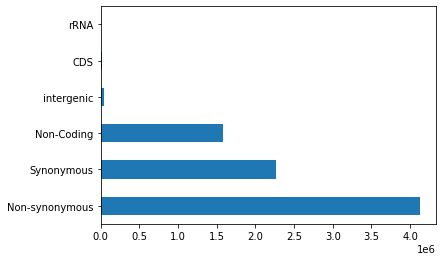

In [123]:
pff.ANNOTATN.value_counts().plot(kind = 'barh')

In [6]:
pff.VARTYPE.value_counts()

SNP          6092873
Deletion      177226
Insertion     162665
MNV            17730
Name: VARTYPE, dtype: int64

In [7]:
pff.shape

(8025634, 31)

In [8]:
pff.value_counts('VARTYPE')

VARTYPE
SNP          6092873
Deletion      177226
Insertion     162665
MNV            17730
dtype: int64

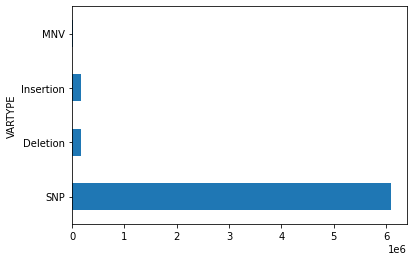

In [12]:
ax = pff.value_counts('VARTYPE').plot(kind="barh")

In [13]:
fig = ax.get_figure()
fig.savefig('../1_data/pff_valct.png')

In [8]:
#Variant Type Variant Type : SNP, INDEL, Insertion, Deletion, MNV,  NA
# set(pff.VARTYPE)

In [7]:
pff_subcol = pff[["ISOLATID", "GENENAME", "NUCHANGE","VARTYPE", 'ANNOTATN']]

In [8]:
pff_subcol.head(5)

,ISOLATID,GENENAME,NUCHANGE,VARTYPE,ANNOTATN
0,SRR2099974,gidB,615A>G,SNP,Synonymous
1,SRR2101147,gidB,615A>G,SNP,Synonymous
2,SRR2100301,gidB,615A>G,SNP,Synonymous
3,SRR2100175,gidB,615A>G,SNP,Synonymous
4,SRR2101271,gidB,615A>G,SNP,Synonymous


In [9]:
# 取出几列后直接保存
# pff_subcol.to_csv("../1_data/pff_subcol.csv", index= False)

In [10]:
#去重前pff_subcol
pff_subcol

,ISOLATID,GENENAME,NUCHANGE,VARTYPE,ANNOTATN
0,SRR2099974,gidB,615A>G,SNP,Synonymous
1,SRR2101147,gidB,615A>G,SNP,Synonymous
2,SRR2100301,gidB,615A>G,SNP,Synonymous
3,SRR2100175,gidB,615A>G,SNP,Synonymous
4,SRR2101271,gidB,615A>G,SNP,Synonymous
...,...,...,...,...,...
8025629,7954-05,NaN,-1C>T,NaN,Non-Coding
8025630,9407-10,mrsA,397G>A,SNP,Non-synonymous
8025631,ERR229929,ald upstream,-32T>C,SNP,intergenic
8025632,ERR229936,ald upstream,-32T>C,SNP,intergenic


In [11]:
pff_subcol = pff_subcol.drop_duplicates(['ISOLATID','GENENAME','NUCHANGE'], keep='last')

In [12]:
#6680055去重后
pff_subcol

,ISOLATID,GENENAME,NUCHANGE,VARTYPE,ANNOTATN
0,SRR2099974,gidB,615A>G,SNP,Synonymous
1,SRR2101147,gidB,615A>G,SNP,Synonymous
2,SRR2100301,gidB,615A>G,SNP,Synonymous
3,SRR2100175,gidB,615A>G,SNP,Synonymous
4,SRR2101271,gidB,615A>G,SNP,Synonymous
...,...,...,...,...,...
8025629,7954-05,NaN,-1C>T,NaN,Non-Coding
8025630,9407-10,mrsA,397G>A,SNP,Non-synonymous
8025631,ERR229929,ald upstream,-32T>C,SNP,intergenic
8025632,ERR229936,ald upstream,-32T>C,SNP,intergenic


In [13]:
#由于有些基因名字是空的 
#如果当前行为空的列 直接删除本行数据
#去重后还有 6450494行 
pff_subcol = pff_subcol[pff_subcol.GENENAME.notnull()]
pff_subcol

,ISOLATID,GENENAME,NUCHANGE,VARTYPE,ANNOTATN
0,SRR2099974,gidB,615A>G,SNP,Synonymous
1,SRR2101147,gidB,615A>G,SNP,Synonymous
2,SRR2100301,gidB,615A>G,SNP,Synonymous
3,SRR2100175,gidB,615A>G,SNP,Synonymous
4,SRR2101271,gidB,615A>G,SNP,Synonymous
...,...,...,...,...,...
8025628,2707-10,glgB,1408T>C,SNP,Non-synonymous
8025630,9407-10,mrsA,397G>A,SNP,Non-synonymous
8025631,ERR229929,ald upstream,-32T>C,SNP,intergenic
8025632,ERR229936,ald upstream,-32T>C,SNP,intergenic


In [14]:
pff_subcol.shape

(6450494, 5)

In [15]:
pff_subcol.to_csv("../1_data/pff_subcol.csv", index= False)

In [119]:
pff_subcol.isnull().any()

ISOLATID    False
GENENAME    False
NUCHANGE    False
VARTYPE     False
ANNOTATN    False
dtype: bool

In [127]:
pff_subcol.value_counts('VARTYPE')

VARTYPE
SNP          6092873
Deletion      177226
Insertion     162665
MNV            17730
dtype: int64

<AxesSubplot:ylabel='VARTYPE'>

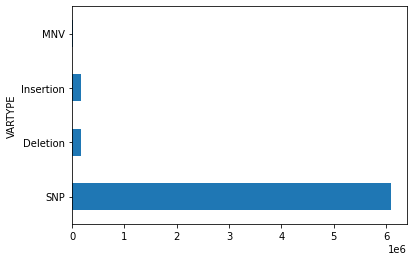

In [38]:
pff_subcol.value_counts('VARTYPE').plot(kind='barh')

<AxesSubplot:ylabel='ANNOTATN'>

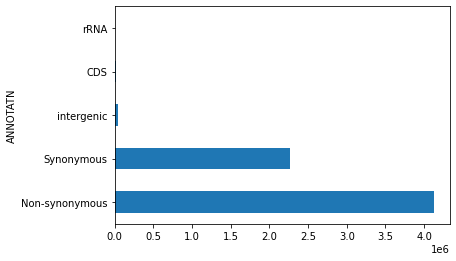

In [120]:
pff_subcol.value_counts('ANNOTATN').plot(kind='barh')

In [121]:
pff_subcol.value_counts('ANNOTATN')

ANNOTATN
Non-synonymous    4121361
Synonymous        2263068
intergenic          40907
CDS                 22215
rRNA                 2943
dtype: int64

In [35]:
import matplotlib.pyplot as plt

In [27]:
#对去重后的数据重新编写索引
pff_subcol = pff_subcol.reset_index(drop=True)
pff_subcol

,ISOLATID,GENENAME,NUCHANGE,VARTYPE
0,SRR2099974,gidB,615A>G,SNP
1,SRR2101147,gidB,615A>G,SNP
2,SRR2100301,gidB,615A>G,SNP
3,SRR2100175,gidB,615A>G,SNP
4,SRR2101271,gidB,615A>G,SNP
...,...,...,...,...
6450489,2707-10,glgB,1408T>C,SNP
6450490,9407-10,mrsA,397G>A,SNP
6450491,ERR229929,ald upstream,-32T>C,SNP
6450492,ERR229936,ald upstream,-32T>C,SNP


In [28]:
#对去重 去掉none的数据进行保存
# 6450494 行 4列
pff_subcol.to_csv("../1_data/pff_subcol2.csv", index= False)

In [29]:
pff_subcol

,ISOLATID,GENENAME,NUCHANGE,VARTYPE
0,SRR2099974,gidB,615A>G,SNP
1,SRR2101147,gidB,615A>G,SNP
2,SRR2100301,gidB,615A>G,SNP
3,SRR2100175,gidB,615A>G,SNP
4,SRR2101271,gidB,615A>G,SNP
...,...,...,...,...
6450489,2707-10,glgB,1408T>C,SNP
6450490,9407-10,mrsA,397G>A,SNP
6450491,ERR229929,ald upstream,-32T>C,SNP
6450492,ERR229936,ald upstream,-32T>C,SNP


In [14]:
pff_subcol = pd.read_csv("../1_data/pff_subcol.csv")
pff_subcol

,ISOLATID,GENENAME,NUCHANGE,VARTYPE,ANNOTATN
0,SRR2099974,gidB,615A>G,SNP,Synonymous
1,SRR2101147,gidB,615A>G,SNP,Synonymous
2,SRR2100301,gidB,615A>G,SNP,Synonymous
3,SRR2100175,gidB,615A>G,SNP,Synonymous
4,SRR2101271,gidB,615A>G,SNP,Synonymous
...,...,...,...,...,...
6450489,2707-10,glgB,1408T>C,SNP,Non-synonymous
6450490,9407-10,mrsA,397G>A,SNP,Non-synonymous
6450491,ERR229929,ald upstream,-32T>C,SNP,intergenic
6450492,ERR229936,ald upstream,-32T>C,SNP,intergenic


In [15]:
set(pff_subcol.GENENAME.values)

{'Rv1810',
 'Rv0302',
 'trpS',
 'Rv0880',
 'adhB',
 'Rv1928c',
 'Rv0802c',
 'pstC1',
 'pheS',
 'Rv1194c',
 'Rv3282',
 'Rv0948c',
 'plcC',
 'Rv0990c',
 'aac',
 'htdX',
 'Rv2305',
 'eccC2',
 'Rv2671',
 'pbpA',
 'Rv0725c',
 'moaC1',
 'Rv1812c',
 'glpQ1',
 'Rv3489',
 'Rv1505c',
 'pks4',
 'lppQ',
 'Rv3242c',
 'Rv2668',
 'Rv3118',
 'Rv2781c',
 'Rv1314c',
 'dacB1',
 'dapF',
 'Rv0851c',
 'mutT3',
 'Rv3071',
 'relG',
 'Rv1178',
 'kdpA',
 'vapC48',
 'fadD2',
 'pntB',
 'Rv0325',
 'Rv2223c',
 'trcR',
 'Rv2749',
 'Rv3493c',
 'Rv3857c',
 'Rv3863',
 'egtE',
 'che1',
 'argH',
 'Rv2598',
 'Rv0360c',
 'lipR',
 'Rv2508c',
 'Rv2129c',
 'glfT2',
 'rslA',
 'mce2A',
 'fusA1',
 'Rv0313',
 'Rv2050',
 'deaD',
 'ackA',
 'Rv2148c',
 'Rv2292c',
 'uvrB',
 'recN',
 'mtc28',
 'Rv3047c',
 'serB2',
 'Rv3055',
 'mbtN',
 'Rv1761c',
 'Rv0852',
 'Rv1003',
 'amiD',
 'accA3',
 'Rv1760',
 'Rv1057',
 'Rv2632c',
 'ldtD',
 'Rv0876c',
 'Rv1491c',
 'Rv0804',
 'Rv2415c',
 'galU',
 'Rv2563',
 'cydA',
 'Rv0025',
 'Rv1824',
 'dnaJ2',


In [16]:
len(set(pff_subcol.NUCHANGE.values))

48341

In [17]:
#总的菌株数量
len(set(pff_subcol.GENENAME.values))

3697

In [7]:
#拥有四种不同的VARTYPE变异类型
set(pff_subcol.VARTYPE)

{'Deletion', 'Insertion', 'MNV', 'SNP'}

In [24]:
#过滤后的菌株  6756
len(set(pff_subcol.ISOLATID.values))

6756

In [18]:
msf = pd.read_csv("../origin_data/msf.csv")

In [19]:
# 36376 rows × 19 columns 参与实验的所有菌株
msf

,STUDYID,USUBJID,SPDEVID,MSSEQ,MSREFID,MSTESTCD,MSTEST,MSDRUG,MSCRICON,MSCONC,MSCONCU,MSCAT,MSORRES,MSSTRESC,MSSPEC,MSMETHOD,MSDRVFL,YRCOLL,MEDIATYP
0,IS-1017,GMTV000396,NaN,3,ERR228017,DST,Drug Susceptibility Testing,ETHAMBUTOL,NaN,NaN,NaN,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,NaN,NaN,NaN,NaN
1,IS-1017,GMTV001205,NaN,6,SRR671815,DST,Drug Susceptibility Testing,OFLOXACIN,2.0,NaN,mg/L,PHENOTYPIC,R,RESISTANT,ISOLATE,AGAR PROPORTION,NaN,NaN,LOWENSTEIN-JENSEN
2,IS-1017,GMTV000224,BACTEC MGIT 960,8,ERR067735,DST,Drug Susceptibility Testing,PYRAZINAMIDE,100.0,NaN,mg/L,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,"MICROBIAL CULTURE, LIQUID",NaN,NaN,NaN
3,IS-1017,GMTV000657,BACTEC MGIT 960,3,ERR144608,DST,Drug Susceptibility Testing,PYRAZINAMIDE,100.0,NaN,mg/L,PHENOTYPIC,R,RESISTANT,ISOLATE,"MICROBIAL CULTURE, LIQUID",NaN,NaN,NaN
4,IS-1017,GMTV001197,NaN,7,SRR671805,DST,Drug Susceptibility Testing,RIFAMPICIN,40.0,NaN,mg/L,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,AGAR PROPORTION,NaN,NaN,LOWENSTEIN-JENSEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36371,IS-1009,IFP-99ffcf4b,BACTEC MGIT 960,2,IFP-55731489,DST,Drug Susceptibility Testing,CAPREOMYCIN,2.5,NaN,mg/L,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,"MICROBIAL CULTURE, LIQUID",NaN,2016.0,NaN
36372,IS-1009,IFP-56758781,BACTEC MGIT 960,8,IFP-685eeaf4,DST,Drug Susceptibility Testing,PROTHIONAMIDE,NaN,NaN,NaN,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,"MICROBIAL CULTURE, LIQUID",NaN,2012.0,NaN
36373,IS-1009,IFP-33baf186,NaN,6,IFP-6ef3881c,DST,Drug Susceptibility Testing,OFLOXACIN,NaN,NaN,NaN,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,AGAR PROPORTION,NaN,2011.0,LOWENSTEIN-JENSEN
36374,IS-1009,IFP-a0640adf,NaN,9,IFP-90a25efa,DST,Drug Susceptibility Testing,PARA-AMINOSALICYLIC ACID,NaN,NaN,NaN,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,AGAR PROPORTION,NaN,2016.0,LOWENSTEIN-JENSEN


In [20]:
#做去重处理
msf.columns

Index(['STUDYID', 'USUBJID', 'SPDEVID', 'MSSEQ', 'MSREFID', 'MSTESTCD',
       'MSTEST', 'MSDRUG', 'MSCRICON', 'MSCONC', 'MSCONCU', 'MSCAT', 'MSORRES',
       'MSSTRESC', 'MSSPEC', 'MSMETHOD', 'MSDRVFL', 'YRCOLL', 'MEDIATYP'],
      dtype='object')

In [21]:
set(msf.MSSPEC)

{'ISOLATE'}

In [22]:
len(set(msf.MSDRUG))

21

In [23]:
msf.MSDRUG.value_counts()

ISONIAZID                   5337
RIFAMPICIN                  5110
ETHAMBUTOL                  4951
PYRAZINAMIDE                4270
STREPTOMYCIN                2986
CAPREOMYCIN                 2385
OFLOXACIN                   2309
AMIKACIN                    2302
KANAMYCIN                   1872
MOXIFLOXACIN                1511
ETHIONAMIDE                  783
LEVOFLOXACIN                 576
PARA-AMINOSALICYLIC ACID     551
PROTHIONAMIDE                502
CIPROFLOXACIN                358
RIFABUTIN                    307
CYCLOSERINE                  262
LINEZOLID                      1
CLOFAZIMINE                    1
IMIPENEM                       1
AMOXICILLIN/CLAVULANATE        1
Name: MSDRUG, dtype: int64

<AxesSubplot:>

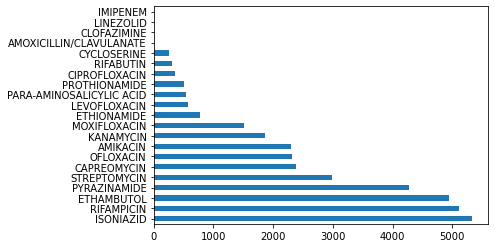

In [51]:
msf.MSDRUG.value_counts().plot(kind='barh')

In [24]:
msf = msf.drop_duplicates(keep="first")

In [25]:
#实验没有完全重复的
msf

,STUDYID,USUBJID,SPDEVID,MSSEQ,MSREFID,MSTESTCD,MSTEST,MSDRUG,MSCRICON,MSCONC,MSCONCU,MSCAT,MSORRES,MSSTRESC,MSSPEC,MSMETHOD,MSDRVFL,YRCOLL,MEDIATYP
0,IS-1017,GMTV000396,NaN,3,ERR228017,DST,Drug Susceptibility Testing,ETHAMBUTOL,NaN,NaN,NaN,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,NaN,NaN,NaN,NaN
1,IS-1017,GMTV001205,NaN,6,SRR671815,DST,Drug Susceptibility Testing,OFLOXACIN,2.0,NaN,mg/L,PHENOTYPIC,R,RESISTANT,ISOLATE,AGAR PROPORTION,NaN,NaN,LOWENSTEIN-JENSEN
2,IS-1017,GMTV000224,BACTEC MGIT 960,8,ERR067735,DST,Drug Susceptibility Testing,PYRAZINAMIDE,100.0,NaN,mg/L,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,"MICROBIAL CULTURE, LIQUID",NaN,NaN,NaN
3,IS-1017,GMTV000657,BACTEC MGIT 960,3,ERR144608,DST,Drug Susceptibility Testing,PYRAZINAMIDE,100.0,NaN,mg/L,PHENOTYPIC,R,RESISTANT,ISOLATE,"MICROBIAL CULTURE, LIQUID",NaN,NaN,NaN
4,IS-1017,GMTV001197,NaN,7,SRR671805,DST,Drug Susceptibility Testing,RIFAMPICIN,40.0,NaN,mg/L,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,AGAR PROPORTION,NaN,NaN,LOWENSTEIN-JENSEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36371,IS-1009,IFP-99ffcf4b,BACTEC MGIT 960,2,IFP-55731489,DST,Drug Susceptibility Testing,CAPREOMYCIN,2.5,NaN,mg/L,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,"MICROBIAL CULTURE, LIQUID",NaN,2016.0,NaN
36372,IS-1009,IFP-56758781,BACTEC MGIT 960,8,IFP-685eeaf4,DST,Drug Susceptibility Testing,PROTHIONAMIDE,NaN,NaN,NaN,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,"MICROBIAL CULTURE, LIQUID",NaN,2012.0,NaN
36373,IS-1009,IFP-33baf186,NaN,6,IFP-6ef3881c,DST,Drug Susceptibility Testing,OFLOXACIN,NaN,NaN,NaN,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,AGAR PROPORTION,NaN,2011.0,LOWENSTEIN-JENSEN
36374,IS-1009,IFP-a0640adf,NaN,9,IFP-90a25efa,DST,Drug Susceptibility Testing,PARA-AMINOSALICYLIC ACID,NaN,NaN,NaN,PHENOTYPIC,S,SUSCEPTIBLE,ISOLATE,AGAR PROPORTION,NaN,2016.0,LOWENSTEIN-JENSEN


In [37]:
#但是排除药物在不同浓度下会有不同的效果
#因此我们只针对以下几列去重
msf_subcol = msf[['MSREFID', 'MSDRUG', 'MSSTRESC']]

In [38]:
msf_subcol.head()

,MSREFID,MSDRUG,MSSTRESC
0,ERR228017,ETHAMBUTOL,SUSCEPTIBLE
1,SRR671815,OFLOXACIN,RESISTANT
2,ERR067735,PYRAZINAMIDE,SUSCEPTIBLE
3,ERR144608,PYRAZINAMIDE,RESISTANT
4,SRR671805,RIFAMPICIN,SUSCEPTIBLE


In [40]:
#本次去重是不考虑药物的浓度， 一种药药物在不同的浓度下得到了相同的结果
msf_subcol = msf_subcol.drop_duplicates(keep="first")

In [41]:
#去重后还有33135 条数据
msf_subcol

,MSREFID,MSDRUG,MSSTRESC
0,ERR228017,ETHAMBUTOL,SUSCEPTIBLE
1,SRR671815,OFLOXACIN,RESISTANT
2,ERR067735,PYRAZINAMIDE,SUSCEPTIBLE
3,ERR144608,PYRAZINAMIDE,RESISTANT
4,SRR671805,RIFAMPICIN,SUSCEPTIBLE
...,...,...,...
36371,IFP-55731489,CAPREOMYCIN,SUSCEPTIBLE
36372,IFP-685eeaf4,PROTHIONAMIDE,SUSCEPTIBLE
36373,IFP-6ef3881c,OFLOXACIN,SUSCEPTIBLE
36374,IFP-90a25efa,PARA-AMINOSALICYLIC ACID,SUSCEPTIBLE


In [42]:
msf_subcol.MSSTRESC.value_counts()

SUSCEPTIBLE    24635
RESISTANT       7681
BORDERLINE       819
Name: MSSTRESC, dtype: int64

In [43]:
ls = []

for name, group in msf_subcol.groupby(['MSREFID','MSDRUG']):
    if(len(group) > 1):
        ls.append("_".join(name))
ls

['14-13759_AMIKACIN',
 '14-13759_CAPREOMYCIN',
 '14-13759_KANAMYCIN',
 '14-13760_AMIKACIN',
 '14-13760_CAPREOMYCIN',
 '14-13760_KANAMYCIN',
 '14-13762_AMIKACIN',
 '14-13762_CAPREOMYCIN',
 '14-13762_KANAMYCIN',
 '14-13763_AMIKACIN',
 '14-13763_CAPREOMYCIN',
 '14-13763_KANAMYCIN',
 '14-13764_AMIKACIN',
 '14-13764_CAPREOMYCIN',
 '14-13764_KANAMYCIN',
 '14-13765_AMIKACIN',
 '14-13765_CAPREOMYCIN',
 '14-13765_KANAMYCIN',
 '14-13766_AMIKACIN',
 '14-13766_CAPREOMYCIN',
 '14-13766_KANAMYCIN',
 '14-13767_AMIKACIN',
 '14-13767_CAPREOMYCIN',
 '14-13767_KANAMYCIN',
 '14-13767_RIFAMPICIN',
 '14-13768_AMIKACIN',
 '14-13768_CAPREOMYCIN',
 '14-13768_KANAMYCIN',
 '14-13769_AMIKACIN',
 '14-13769_CAPREOMYCIN',
 '14-13769_KANAMYCIN',
 '14-13771_AMIKACIN',
 '14-13771_CAPREOMYCIN',
 '14-13771_KANAMYCIN',
 '14-13772_AMIKACIN',
 '14-13772_CAPREOMYCIN',
 '14-13772_KANAMYCIN',
 '14-13773_CAPREOMYCIN',
 '14-13774_AMIKACIN',
 '14-13774_CAPREOMYCIN',
 '14-13774_KANAMYCIN',
 '14-13775_AMIKACIN',
 '14-13775_CAPREOMY

In [44]:
#在不同浓度下有不同耐药性结果的数据有845条
len(ls)

845

In [46]:
msf_subcol["tmp"] = msf_subcol['MSREFID']+"_"+msf_subcol['MSDRUG']

In [47]:
msf_subcol

,MSREFID,MSDRUG,MSSTRESC,tmp
0,ERR228017,ETHAMBUTOL,SUSCEPTIBLE,ERR228017_ETHAMBUTOL
1,SRR671815,OFLOXACIN,RESISTANT,SRR671815_OFLOXACIN
2,ERR067735,PYRAZINAMIDE,SUSCEPTIBLE,ERR067735_PYRAZINAMIDE
3,ERR144608,PYRAZINAMIDE,RESISTANT,ERR144608_PYRAZINAMIDE
4,SRR671805,RIFAMPICIN,SUSCEPTIBLE,SRR671805_RIFAMPICIN
...,...,...,...,...
36371,IFP-55731489,CAPREOMYCIN,SUSCEPTIBLE,IFP-55731489_CAPREOMYCIN
36372,IFP-685eeaf4,PROTHIONAMIDE,SUSCEPTIBLE,IFP-685eeaf4_PROTHIONAMIDE
36373,IFP-6ef3881c,OFLOXACIN,SUSCEPTIBLE,IFP-6ef3881c_OFLOXACIN
36374,IFP-90a25efa,PARA-AMINOSALICYLIC ACID,SUSCEPTIBLE,IFP-90a25efa_PARA-AMINOSALICYLIC ACID


In [48]:
msf_subcol = msf_subcol[~msf_subcol.tmp.isin(ls)].drop('tmp',axis=1)

In [49]:
msf_subcol.reset_index(inplace=True)

In [50]:
msf_subcol

,index,MSREFID,MSDRUG,MSSTRESC
0,0,ERR228017,ETHAMBUTOL,SUSCEPTIBLE
1,1,SRR671815,OFLOXACIN,RESISTANT
2,2,ERR067735,PYRAZINAMIDE,SUSCEPTIBLE
3,3,ERR144608,PYRAZINAMIDE,RESISTANT
4,4,SRR671805,RIFAMPICIN,SUSCEPTIBLE
...,...,...,...,...
31438,36371,IFP-55731489,CAPREOMYCIN,SUSCEPTIBLE
31439,36372,IFP-685eeaf4,PROTHIONAMIDE,SUSCEPTIBLE
31440,36373,IFP-6ef3881c,OFLOXACIN,SUSCEPTIBLE
31441,36374,IFP-90a25efa,PARA-AMINOSALICYLIC ACID,SUSCEPTIBLE


<AxesSubplot:>

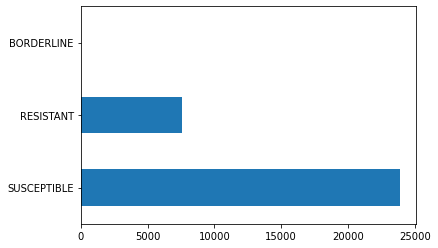

In [104]:
msf_subcol.MSSTRESC.value_counts().plot(kind='barh')

In [51]:
msf_subcol.MSSTRESC.value_counts()

SUSCEPTIBLE    23843
RESISTANT       7544
BORDERLINE        56
Name: MSSTRESC, dtype: int64

In [57]:
msf_subcol = msf_subcol[msf_subcol.MSSTRESC != 'BORDERLINE']

In [59]:
msf_subcol.reset_index(inplace=True)

In [69]:
msf_subcol.drop(['level_0', 'index'], axis=1, inplace=True)

D:\codingTool\anoconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
msf_subcol.rename(columns={'MSREFID':'ISOLATID'},inplace=True)

In [55]:
msf_subcol

,index,ISOLATID,MSDRUG,MSSTRESC
0,0,ERR228017,ETHAMBUTOL,SUSCEPTIBLE
1,1,SRR671815,OFLOXACIN,RESISTANT
2,2,ERR067735,PYRAZINAMIDE,SUSCEPTIBLE
3,3,ERR144608,PYRAZINAMIDE,RESISTANT
4,4,SRR671805,RIFAMPICIN,SUSCEPTIBLE
...,...,...,...,...
31438,36371,IFP-55731489,CAPREOMYCIN,SUSCEPTIBLE
31439,36372,IFP-685eeaf4,PROTHIONAMIDE,SUSCEPTIBLE
31440,36373,IFP-6ef3881c,OFLOXACIN,SUSCEPTIBLE
31441,36374,IFP-90a25efa,PARA-AMINOSALICYLIC ACID,SUSCEPTIBLE


In [63]:
#通过这个我们可以了解到 参与实验的菌株一共有4849个菌株
len(list(set(msf_subcol.ISOLATID.values)))

4849

In [65]:
#检查同一个菌株一种药物是否对应多个结果
ls = []

for name, group in msf_subcol.groupby(['ISOLATID','MSDRUG']):
    if(len(group) > 1):
        ls.append("_".join(name))
ls

[]

In [67]:
msf_subcol.shape

(31387, 5)

In [70]:
#检查是否有重复的
msf_subcol.drop_duplicates(keep=False)

,ISOLATID,MSDRUG,MSSTRESC
0,ERR228017,ETHAMBUTOL,SUSCEPTIBLE
1,SRR671815,OFLOXACIN,RESISTANT
2,ERR067735,PYRAZINAMIDE,SUSCEPTIBLE
3,ERR144608,PYRAZINAMIDE,RESISTANT
4,SRR671805,RIFAMPICIN,SUSCEPTIBLE
...,...,...,...
31382,IFP-55731489,CAPREOMYCIN,SUSCEPTIBLE
31383,IFP-685eeaf4,PROTHIONAMIDE,SUSCEPTIBLE
31384,IFP-6ef3881c,OFLOXACIN,SUSCEPTIBLE
31385,IFP-90a25efa,PARA-AMINOSALICYLIC ACID,SUSCEPTIBLE


In [71]:
#将去重厚的结果保存
msf_subcol.to_csv('../1_data/msf_subcol.csv', index= False)

In [2]:
msf_subcol = pd.read_csv('../1_data/msf_subcol.csv')

In [3]:
msf_subcol

,ISOLATID,MSDRUG,MSSTRESC
0,ERR228017,ETHAMBUTOL,SUSCEPTIBLE
1,SRR671815,OFLOXACIN,RESISTANT
2,ERR067735,PYRAZINAMIDE,SUSCEPTIBLE
3,ERR144608,PYRAZINAMIDE,RESISTANT
4,SRR671805,RIFAMPICIN,SUSCEPTIBLE
...,...,...,...
31382,IFP-55731489,CAPREOMYCIN,SUSCEPTIBLE
31383,IFP-685eeaf4,PROTHIONAMIDE,SUSCEPTIBLE
31384,IFP-6ef3881c,OFLOXACIN,SUSCEPTIBLE
31385,IFP-90a25efa,PARA-AMINOSALICYLIC ACID,SUSCEPTIBLE


In [5]:
nodrug = ['AMOXICILLIN/CLAVULANATE','CLOFAZIMINE','LINEZOLID','IMIPENEM']

In [7]:
len(list(set(msf_subcol.ISOLATID.values)))

4849

In [6]:
msf_subcol = msf_subcol[~msf_subcol.MSDRUG.isin(nodrug)]
msf_subcol

,ISOLATID,MSDRUG,MSSTRESC
0,ERR228017,ETHAMBUTOL,SUSCEPTIBLE
1,SRR671815,OFLOXACIN,RESISTANT
2,ERR067735,PYRAZINAMIDE,SUSCEPTIBLE
3,ERR144608,PYRAZINAMIDE,RESISTANT
4,SRR671805,RIFAMPICIN,SUSCEPTIBLE
...,...,...,...
31382,IFP-55731489,CAPREOMYCIN,SUSCEPTIBLE
31383,IFP-685eeaf4,PROTHIONAMIDE,SUSCEPTIBLE
31384,IFP-6ef3881c,OFLOXACIN,SUSCEPTIBLE
31385,IFP-90a25efa,PARA-AMINOSALICYLIC ACID,SUSCEPTIBLE


In [8]:
#这次保存是后补的， 需要去掉四个只有1次实验药物的数据
msf_subcol.to_csv('../1_data/msf_subcol.csv', index= False)

In [9]:
#对数据进行了重新融合

In [10]:
pff_subcol = pd.read_csv('../1_data/pff_subcol.csv')

In [28]:
# pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
#          left_index=False, right_index=False, sort=True,
#          suffixes=('_x', '_y'), copy=True, indicator=False,
#          validate=None)

In [29]:
#将两张表先做一个融合

In [11]:
pff_msf = pd.merge(pff_subcol, msf_subcol, how='inner', on='ISOLATID', right_index=False,left_index=False)

In [12]:
pff_msf

,ISOLATID,GENENAME,NUCHANGE,VARTYPE,ANNOTATN,MSDRUG,MSSTRESC
0,SRR2099974,gidB,615A>G,SNP,Synonymous,ETHAMBUTOL,RESISTANT
1,SRR2099974,gidB,615A>G,SNP,Synonymous,RIFAMPICIN,RESISTANT
2,SRR2099974,gidB,615A>G,SNP,Synonymous,PYRAZINAMIDE,SUSCEPTIBLE
3,SRR2099974,gidB,615A>G,SNP,Synonymous,ISONIAZID,RESISTANT
4,SRR2099974,gidB,223C>T,SNP,Non-synonymous,ETHAMBUTOL,RESISTANT
...,...,...,...,...,...,...,...
30315007,IFP-bfca1a36,Rv1358,3341G>A,SNP,Non-synonymous,ETHAMBUTOL,SUSCEPTIBLE
30315008,IFP-bfca1a36,Rv2434c,1127C>G,SNP,Non-synonymous,STREPTOMYCIN,SUSCEPTIBLE
30315009,IFP-bfca1a36,Rv2434c,1127C>G,SNP,Non-synonymous,ISONIAZID,SUSCEPTIBLE
30315010,IFP-bfca1a36,Rv2434c,1127C>G,SNP,Non-synonymous,RIFAMPICIN,SUSCEPTIBLE


In [13]:
#左右量边的数据融合玩之后  菌株有4849个
len(set(pff_msf.ISOLATID.values))

4849

In [34]:
import matplotlib.pyplot as plt

In [76]:
pff_msf

,ISOLATID,GENENAME,NUCHANGE,VARTYPE,ANNOTATN,MSDRUG,MSSTRESC
0,SRR2099974,gidB,615A>G,SNP,Synonymous,ETHAMBUTOL,RESISTANT
1,SRR2099974,gidB,615A>G,SNP,Synonymous,RIFAMPICIN,RESISTANT
2,SRR2099974,gidB,615A>G,SNP,Synonymous,PYRAZINAMIDE,SUSCEPTIBLE
3,SRR2099974,gidB,615A>G,SNP,Synonymous,ISONIAZID,RESISTANT
4,SRR2099974,gidB,223C>T,SNP,Non-synonymous,ETHAMBUTOL,RESISTANT
...,...,...,...,...,...,...,...
30319490,IFP-bfca1a36,Rv1358,3341G>A,SNP,Non-synonymous,ETHAMBUTOL,SUSCEPTIBLE
30319491,IFP-bfca1a36,Rv2434c,1127C>G,SNP,Non-synonymous,STREPTOMYCIN,SUSCEPTIBLE
30319492,IFP-bfca1a36,Rv2434c,1127C>G,SNP,Non-synonymous,ISONIAZID,SUSCEPTIBLE
30319493,IFP-bfca1a36,Rv2434c,1127C>G,SNP,Non-synonymous,RIFAMPICIN,SUSCEPTIBLE


In [14]:
#变异基因3694
len(set(pff_msf.GENENAME.values))

3694

In [15]:
#核苷酸变异42282
len(set(pff_msf.NUCHANGE.values))

42282

In [16]:
#抗药为1 敏感为0
def func(x):
    if x == 'RESISTANT':
        return 1
    elif x == 'SUSCEPTIBLE':
        return 0

In [17]:
pff_msf['label'] = pff_msf['MSSTRESC'].apply(func)

In [18]:
pff_msf

,ISOLATID,GENENAME,NUCHANGE,VARTYPE,ANNOTATN,MSDRUG,MSSTRESC,label
0,SRR2099974,gidB,615A>G,SNP,Synonymous,ETHAMBUTOL,RESISTANT,1
1,SRR2099974,gidB,615A>G,SNP,Synonymous,RIFAMPICIN,RESISTANT,1
2,SRR2099974,gidB,615A>G,SNP,Synonymous,PYRAZINAMIDE,SUSCEPTIBLE,0
3,SRR2099974,gidB,615A>G,SNP,Synonymous,ISONIAZID,RESISTANT,1
4,SRR2099974,gidB,223C>T,SNP,Non-synonymous,ETHAMBUTOL,RESISTANT,1
...,...,...,...,...,...,...,...,...
30315007,IFP-bfca1a36,Rv1358,3341G>A,SNP,Non-synonymous,ETHAMBUTOL,SUSCEPTIBLE,0
30315008,IFP-bfca1a36,Rv2434c,1127C>G,SNP,Non-synonymous,STREPTOMYCIN,SUSCEPTIBLE,0
30315009,IFP-bfca1a36,Rv2434c,1127C>G,SNP,Non-synonymous,ISONIAZID,SUSCEPTIBLE,0
30315010,IFP-bfca1a36,Rv2434c,1127C>G,SNP,Non-synonymous,RIFAMPICIN,SUSCEPTIBLE,0


In [19]:
#检验label是否全部打上
set(pff_msf.label)

{0, 1}

In [20]:
#将处理后的数据进行保存
# pff_msf.to_csv("../1_data/pff_msf_label.csv", index=False)

In [3]:
import pandas as pd

In [4]:
pff_msf = pd.read_csv("../1_data/pff_msf_label.csv")

In [5]:
pff_msf

,ISOLATID,GENENAME,NUCHANGE,VARTYPE,ANNOTATN,MSDRUG,MSSTRESC,label
0,SRR2099974,gidB,615A>G,SNP,Synonymous,ETHAMBUTOL,RESISTANT,1
1,SRR2099974,gidB,615A>G,SNP,Synonymous,RIFAMPICIN,RESISTANT,1
2,SRR2099974,gidB,615A>G,SNP,Synonymous,PYRAZINAMIDE,SUSCEPTIBLE,0
3,SRR2099974,gidB,615A>G,SNP,Synonymous,ISONIAZID,RESISTANT,1
4,SRR2099974,gidB,223C>T,SNP,Non-synonymous,ETHAMBUTOL,RESISTANT,1
...,...,...,...,...,...,...,...,...
30315007,IFP-bfca1a36,Rv1358,3341G>A,SNP,Non-synonymous,ETHAMBUTOL,SUSCEPTIBLE,0
30315008,IFP-bfca1a36,Rv2434c,1127C>G,SNP,Non-synonymous,STREPTOMYCIN,SUSCEPTIBLE,0
30315009,IFP-bfca1a36,Rv2434c,1127C>G,SNP,Non-synonymous,ISONIAZID,SUSCEPTIBLE,0
30315010,IFP-bfca1a36,Rv2434c,1127C>G,SNP,Non-synonymous,RIFAMPICIN,SUSCEPTIBLE,0


In [85]:
##将数据部分提取

In [21]:
pff_msf_gene = pff_msf[['ISOLATID','GENENAME','MSDRUG','label']]

In [22]:
pff_msf_gene.head()

,ISOLATID,GENENAME,MSDRUG,label
0,SRR2099974,gidB,ETHAMBUTOL,1
1,SRR2099974,gidB,RIFAMPICIN,1
2,SRR2099974,gidB,PYRAZINAMIDE,0
3,SRR2099974,gidB,ISONIAZID,1
4,SRR2099974,gidB,ETHAMBUTOL,1


In [2]:
pff_msf_gene.to_csv("../1_data/pff_msf_gene.csv", index= False)

NameError: name 'pff_msf_gene' is not defined

In [15]:
pff_msf_nu = pff_msf[['ISOLATID','GENENAME','NUCHANGE','MSDRUG','label']]

In [16]:
pff_msf_nu['GENE_NU'] = pff_msf_nu['GENENAME']+"_"+pff_msf_nu['NUCHANGE']

d:\codingtool\anoconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
pff_msf_nu

,ISOLATID,GENENAME,NUCHANGE,MSDRUG,label,GENE_NU
0,SRR2099974,gidB,615A>G,ETHAMBUTOL,1,gidB_615A>G
1,SRR2099974,gidB,615A>G,RIFAMPICIN,1,gidB_615A>G
2,SRR2099974,gidB,615A>G,PYRAZINAMIDE,0,gidB_615A>G
3,SRR2099974,gidB,615A>G,ISONIAZID,1,gidB_615A>G
4,SRR2099974,gidB,223C>T,ETHAMBUTOL,1,gidB_223C>T
...,...,...,...,...,...,...
30315007,IFP-bfca1a36,Rv1358,3341G>A,ETHAMBUTOL,0,Rv1358_3341G>A
30315008,IFP-bfca1a36,Rv2434c,1127C>G,STREPTOMYCIN,0,Rv2434c_1127C>G
30315009,IFP-bfca1a36,Rv2434c,1127C>G,ISONIAZID,0,Rv2434c_1127C>G
30315010,IFP-bfca1a36,Rv2434c,1127C>G,RIFAMPICIN,0,Rv2434c_1127C>G


In [10]:
# pff_msf_nu.drop(['GENENAME','NUCHANGE'],axis=1, inplace = True)

d:\codingtool\anoconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
# pff_msf_nu

In [19]:
len(set(pff_msf_nu.GENE_NU.values))

240022

In [20]:
pff_msf_nu.to_csv("../1_data/pff_msf_genenu.csv", index= False)